In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from umap import UMAP
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV

In [3]:
random_state = 42

Download: https://www.kaggle.com/datamunge/sign-language-mnist

In [4]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

X_train = train.iloc[:,1:]
y_train = train.label.iloc[:]

X_test = test.iloc[:,1:]
y_test = test.label

In [25]:
estimators = [
    ("knnc", KNeighborsClassifier(
        weights="distance",
        n_neighbors=50,
        n_jobs=-1
    )),
    ("rfc", RandomForestClassifier(
        random_state=random_state,
        class_weight="balanced_subsample",
        n_jobs=-1
    )),
    ("SVC", LinearSVC(
        # max_iter=100000,
        random_state=random_state
    )),
    ("LRC", LogisticRegressionCV(
        # max_iter=1000,
        # solver="liblinear"
    )),
    ("gnb", GaussianNB())
]

gnb = GaussianNB()

In [26]:
reducer = UMAP(
    n_neighbors=30,
    min_dist=0,
    unique=True,
    # metric="cosine",
    n_components=10,
)

pca = PCA(
    n_components=30
)
# classifier = GaussianNB()

class_comp = StackingClassifier(
    estimators=estimators,
    # final_estimator=final_estimator,
    n_jobs=-1,
    verbose=1
)


In [27]:
pipe = make_pipeline(
    pca, 
    # reducer,
    class_comp,
    # gnb,
    verbose=True
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

[Pipeline] ............... (step 1 of 2) Processing pca, total=   1.0s


C:\tools\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Pipeline]  (step 2 of 2) Processing stackingclassifier, total=11.7min


0.8070273284997211

In [28]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    x=pipe["umap"].embedding_[:,0],
    y=pipe["umap"].embedding_[:,1],
    hue=y_train,
    palette="muted",
    s=1
)

KeyError: 'umap'

<Figure size 576x576 with 0 Axes>

In [ ]:
groups = X_train.groupby(y_train)

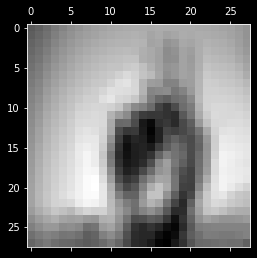

In [ ]:
plt.matshow(
    groups.mean().loc[3].to_numpy().reshape(28, 28), 
    cmap="gray")


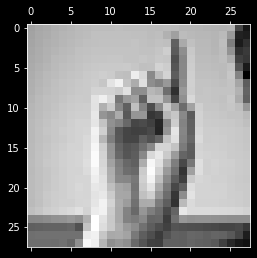

In [ ]:
plt.matshow(
    X_train[y_train==3].iloc[4].to_numpy().reshape(28, 28), 
    cmap="gray")